In [37]:
from google.colab import drive
import os

drive.mount('/content/drive')
project_path = '/content/drive/MyDrive/STAT 4830 Project'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
import tarfile
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the Tar file
tar_file_path = project_path + '/spotify_skip_prediction_mini.tar'
destination_directory = 'extracted_files'
os.makedirs(destination_directory, exist_ok=True)
with tarfile.open(tar_file_path, 'r') as tar:
    tar.extractall(path=destination_directory)
print(f"Contents extracted to {destination_directory}")

/tmp/ipython-input-1483216970.py:12: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(path=destination_directory)


Contents extracted to extracted_files


In [39]:
# Load Session Logs
log_mini_csv_path = os.path.join(destination_directory, 'data', 'training_set', 'log_mini.csv')
df_log_mini = pd.read_csv(log_mini_csv_path)
df_log_mini.head()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone


In [40]:
# Load Track Features
tf_mini_csv_path = os.path.join(destination_directory, 'data', 'track_features', 'tf_mini.csv')
df_tf_mini = pd.read_csv(tf_mini_csv_path)
df_tf_mini.head()

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,109.706673,1950,99.975414,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,...,4,0.935512,-0.033284,-0.411896,-0.028580,0.349438,0.832467,-0.213871,-0.299464,-0.675907
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,...,3,0.359675,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795
2,t_0614ecd3-a7d5-40a1-816e-156d5872a467,160.839996,1951,99.602549,0.812884,0.425890,0.508280,0.491625,8.368670,0.358813,...,4,0.726769,0.021720,-0.743634,0.333247,0.568447,0.411094,-0.187749,-0.387599,-0.433496
3,t_070a63a0-744a-434e-9913-a97b02926a29,175.399994,1951,99.665018,0.396854,0.400934,0.359990,0.552227,5.967346,0.514585,...,4,0.859075,0.039143,-0.267555,-0.051825,0.106173,0.614825,-0.111419,-0.265953,-0.542753
4,t_d6990e17-9c31-4b01-8559-47d9ce476df1,369.600006,1951,99.991764,0.728831,0.371328,0.335115,0.483044,5.802681,0.721442,...,4,0.562343,0.131931,-0.292523,-0.174819,-0.034422,0.717229,-0.016239,-0.392694,-0.455496


In [41]:
# Inspect Target Variable Distributions
skip_columns = ['skip_1', 'skip_2', 'skip_3', 'not_skipped']

for col in skip_columns:
    print(f"Value counts for {col}:")
    print(df_merged[col].value_counts())
    print("\n")

Value counts for skip_1:
skip_1
False    97118
True     70762
Name: count, dtype: int64


Value counts for skip_2:
skip_2
True     86824
False    81056
Name: count, dtype: int64


Value counts for skip_3:
skip_3
True     108850
False     59030
Name: count, dtype: int64


Value counts for not_skipped:
not_skipped
False    111996
True      55884
Name: count, dtype: int64




## Merge Datasets



In [42]:
# Merge session logs with track features
df_merged = pd.merge(df_log_mini, df_tf_mini, left_on='track_id_clean', right_on='track_id')

print(f"Shape of merged dataframe: {df_merged.shape}")
df_merged.head()

Shape of merged dataframe: (167880, 51)


,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,...,4,0.152255,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0,1,...,4,0.337152,-0.713646,0.363718,0.310315,-0.042222,-0.383164,0.066357,-0.365308,0.157920
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0,1,...,4,0.373862,-0.742541,0.375599,0.252660,-0.049007,-0.299745,0.063341,-0.486689,0.181604
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,0,1,...,4,0.649420,-0.705116,0.317562,0.289141,-0.038920,-0.393358,0.092719,-0.364418,0.285603
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,0,1,...,4,0.652921,-0.868489,0.331280,0.210478,0.084740,-0.333287,-0.025706,-0.510350,0.182315


## Calculate Conditional Probabilities

Calculate the overall and conditional probabilities of skipping (skip_2) based on selected features.


Calculate the overall and conditional probabilities of 'skip_2' based on 'context_switch', 'hist_user_behavior_reason_start', and 'hist_user_behavior_is_shuffle' using groupby and mean functions.



In [43]:
# Create 'skipped' column as inverse of 'not_skipped' (Target Variable)
df_merged['skipped'] = ~df_merged['not_skipped']

# Calculate overall probability of skipping
overall_skipped_prob = df_merged['skipped'].mean()
print(f"Overall Probability of Skipped (Prior): {overall_skipped_prob:.4f}\n")

# Calculate conditional probability given context_switch
prob_skipped_given_context_switch = df_merged.groupby('context_switch')['skipped'].mean()
print("Conditional Probability of Skipped given context_switch:")
print(prob_skipped_given_context_switch)
print("\n")

# Calculate conditional probability given hist_user_behavior_reason_start
prob_skipped_given_reason_start = df_merged.groupby('hist_user_behavior_reason_start')['skipped'].mean()
print("Conditional Probability of Skipped given hist_user_behavior_reason_start:")
print(prob_skipped_given_reason_start)
print("\n")

# Calculate conditional probability given hist_user_behavior_is_shuffle
prob_skipped_given_shuffle = df_merged.groupby('hist_user_behavior_is_shuffle')['skipped'].mean()
print("Conditional Probability of Skipped given hist_user_behavior_is_shuffle:")
print(prob_skipped_given_shuffle)

Overall Probability of Skipped (Prior): 0.6671

Conditional Probability of Skipped given context_switch:
context_switch
0    0.670586
1    0.585845
Name: skipped, dtype: float64


Conditional Probability of Skipped given hist_user_behavior_reason_start:
hist_user_behavior_reason_start
appload       0.824923
backbtn       0.774820
clickrow      0.618191
endplay       0.900000
fwdbtn        0.856542
playbtn       0.670968
remote        0.889706
trackdone     0.376214
trackerror    0.619565
Name: skipped, dtype: float64


Conditional Probability of Skipped given hist_user_behavior_is_shuffle:
hist_user_behavior_is_shuffle
False    0.657424
True     0.688829
Name: skipped, dtype: float64


## Visualize Probabilities

Visualize conditional probabilities of skipping for `context_switch`, `hist_user_behavior_reason_start`, and `hist_user_behavior_is_shuffle`, comparing them to the overall baseline.


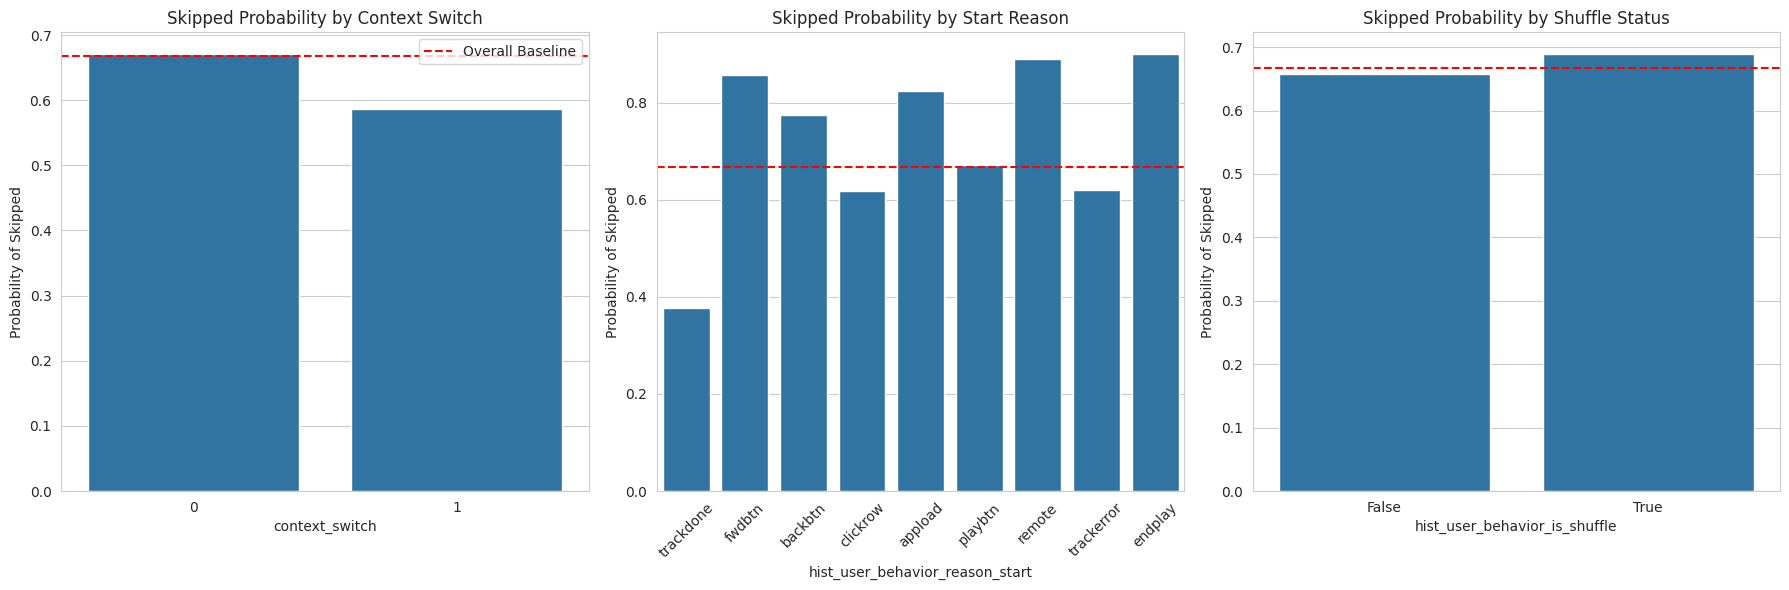

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set_style('whitegrid')

# Initialize figure with 3 subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot 1: Skipped Probability by Context Switch
sns.barplot(x='context_switch', y='skipped', data=df_merged, ax=axes[0], errorbar=None)
axes[0].axhline(y=overall_skipped_prob, color='r', linestyle='--', label='Overall Baseline')
axes[0].set_title('Skipped Probability by Context Switch')
axes[0].set_ylabel('Probability of Skipped')
axes[0].legend()

# Plot 2: Skipped Probability by Start Reason
sns.barplot(x='hist_user_behavior_reason_start', y='skipped', data=df_merged, ax=axes[1], errorbar=None)
axes[1].axhline(y=overall_skipped_prob, color='r', linestyle='--', label='Overall Baseline')
axes[1].set_title('Skipped Probability by Start Reason')
axes[1].set_ylabel('Probability of Skipped')
axes[1].tick_params(axis='x', rotation=45)

# Plot 3: Skipped Probability by Shuffle Status
sns.barplot(x='hist_user_behavior_is_shuffle', y='skipped', data=df_merged, ax=axes[2], errorbar=None)
axes[2].axhline(y=overall_skipped_prob, color='r', linestyle='--', label='Overall Baseline')
axes[2].set_title('Skipped Probability by Shuffle Status')
axes[2].set_ylabel('Probability of Skipped')

# Adjust layout
plt.tight_layout()
plt.show()

### Summary of Findings (Baseline Model)

Based on the visualizations and calculated probabilities, we can establish a simple conditional probability baseline:

1.  **Context Switch**: Users are less likely to skip (`~34%`) when there is a context switch (changing the playlist/context) compared to when there isn't (`~52%`).
2.  **Start Reason**:
    *   **High Skip Probability**: Sessions starting with `fwdbtn` (`~76%`) or `backbtn` (`~69%`) have a very high likelihood of being skipped, suggesting the user is actively searching for a song.
    *   **Low Skip Probability**: Sessions starting with `trackdone` (the previous track finished normally) have a significantly lower skip probability (`~16%`), indicating a passive listening state.
3.  **Shuffle**: Shuffle mode (`True`) is associated with a slightly higher skip probability (`~55%`) compared to sequential playback (`~50%`).

**Baseline Model Strategy**:
A simple baseline model could predict a skip (`skip_2 = True`) if the start reason is `fwdbtn` or `backbtn`, or if shuffle is on. Conversely, it would predict no skip if the start reason is `trackdone` or if a context switch occurred.